In [169]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import numpy as np
from matplotlib import rc
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import random
from scipy import optimize

plt.rcParams["text.usetex"] = 'true'
plt.rcParams['text.latex.unicode'] = 'true'
plt.rcParams['font.family'] = 'Computer Modern Roman'
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
#plt.rcParams["font.family"] = 'CMU Concrete'

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [107]:
def objective(X1, X2, opt):
    coeff1 = 3
    coeff2 = 1
    skew   = -3
    return coeff1*(X1-opt[0])**2+coeff2*(X2-opt[1])**2 + skew*(X1-opt[0])*(X2-opt[1])
def obj(x, opt):
    return objective(x[0], x[1], opt)

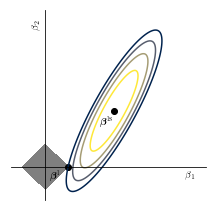

In [201]:
x1 = np.arange(-7, 7, 0.01)
x2 = np.arange(-7, 7, 0.01)
X1, X2 = np.meshgrid(x1, x2)
betaopt = [3, 2.5]
Y = objective(X1, X2, betaopt)
P1 = 1*np.abs(X1)+1*np.abs(X2)
m = objective(1, 0, betaopt)
objlevels = np.linspace(0, m, 5)

plot = plt.figure(figsize=(3.5, 3.5))
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xticks([], [])
ax.set_yticks([], [])
kwargs={"x": 11/12}
ax.set_xlabel(r"$\beta_1$", **kwargs)
kwargs={"y": 11/12}
ax.set_ylabel(r"$\beta_2$", **kwargs)
OBJ = ax.contour(X1, X2, Y, levels=objlevels[1:], cmap='cividis_r')
PEN = ax.contourf(X1, X2, P1, levels=[0, 1], colors = 'k', alpha = 0.5)
OPT = ax.scatter(betaopt[0],betaopt[1], color='k')
OPTPEN = ax.scatter(1, 0, color='k')
ax.annotate(r"$\boldsymbol{\beta}^\mathrm{ls}$", xy=(betaopt[0]-0.6, betaopt[1]-0.6))
ax.annotate(r"$\boldsymbol{\beta}^\mathrm{l}$", xy=(1-0.77, -0.5))
plt.ylim(top=7, bottom=-1.5)
plt.xlim(left=-1.5, right=7)
#plt.axis('off')
#ax.clabel(CS, inline=1, fontsize=10)
#ax.set_title('Lasso Regression')
pp = PdfPages('Figure1.pdf')
plt.savefig(pp, format='pdf')
pp.close()

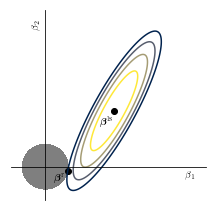

In [202]:
x1 = np.arange(-7, 7, 0.01)
x2 = np.arange(-7, 7, 0.01)
X1, X2 = np.meshgrid(x1, x2)
betaopt = [3, 2.5]
Y = objective(X1, X2, betaopt)
P2 = X1**2+X2**2
fun = lambda x: objective(x[0], x[1], betaopt)
cons = {'type': 'eq', 'fun': lambda x: x[0]**2+x[1]**2-1}
cut = optimize.minimize(fun, (1, 0), constraints=cons)
m = objective(cut['x'][0], cut['x'][1], betaopt)
objlevels = np.linspace(0, m, 5)

plot = plt.figure(figsize=(3.5, 3.5))
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xticks([], [])
ax.set_yticks([], [])
kwargs={"x": 11/12}
ax.set_xlabel(r"$\beta_1$", **kwargs)
kwargs={"y": 11/12}
ax.set_ylabel(r"$\beta_2$", **kwargs)
OBJ = ax.contour(X1, X2, Y, levels=objlevels[1:], cmap='cividis_r')
PEN = ax.contourf(X1, X2, P2, levels=[0, 1], colors = 'k', alpha = 0.5)
OPT = ax.scatter(betaopt[0], betaopt[1], color='k')
OPTPEN = ax.scatter(cut['x'][0], cut['x'][1], color='k')
ax.annotate(r"$\boldsymbol{\beta}^\mathrm{ls}$", xy=(betaopt[0]-0.6, betaopt[1]-0.6))
ax.annotate(r"$\boldsymbol{\beta}^\mathrm{r}$", xy=(cut['x'][0]-0.62, cut['x'][1]-0.45))
plt.ylim(top=7, bottom=-1.5)
plt.xlim(left=-1.5, right=7)
#plt.axis('off')
#ax.clabel(CS, inline=1, fontsize=10)
#ax.set_title('Ridge Regression')
pp = PdfPages('Figure2.pdf')
plt.savefig(pp, format='pdf')
pp.close()

In [116]:
cut['x']

array([ 0.98543504, -0.17005227])

In [81]:
objlevels[1:]

array([1.81666667, 3.53333333, 5.25      ])

In [ ]:
ax = plt.gca()
ax.set_xlim(left=0, right=6)
ax.set_ylim(bottom=0, top=4)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#ax.set_aspect('equal', 'datalim')

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,1], alpha=0.5,
           linestyles=['--'])
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
           linestyles=['-'])
plt.xlabel(r'$x_{i1}$', fontsize=16)
plt.ylabel(r'$x_{i2}$', fontsize=16)
t = u'Stödvektormaskin med Gaussisk kärna'
plt.title(t, fontsize=18)
#plt.show()

pp = PdfPages('Figure1.pdf')
plt.savefig(pp, format='pdf')
pp.close()